# Churn Analysis for SyriaTel Telecommunications.

<div>
    <a href="https://www.dreamstime.com/photos-images/telecom-transmission.html">
        <img src="https://thumbs.dreamstime.com/b/telecommunications-tower-satellite-dish-telecom-network-silhouette-countryside-area-sunrise-73407304.jpg?w=768" alt="Telecommunications Tower" width="1500">
    </a>
    <div>Image credit: <a href="https://www.dreamstime.com/photos-images/telecom-transmission.html">Dreamstime</a></div>
</div>


### Table of Contents
1. [Overview](#overview)
2. [Business Objectives](#business-objectives)
3. [Data Understanding](#data-understanding)
4. [Data Preparation](#data-preparation)
5. [Exploratory Data Analysis](#eda)
6. [Modeling](#modeling)
   - Feature Selection
   - Data Splitting
   - Data Preprocessing
   - Baseline Model - Logistic Regression
   - Exploring Different Models
   - Pipeline Building
   - Model Persistence
7. [Conclusion](#conclusion)
   - Recommendations

<a id="overview"></a>
## 1. Overview

SyriaTel, a leading telecommunications company, is determined to gain valuable insights into customer churn. Their primary goal is to enhance their services and, in turn, retain a higher number of customers, ultimately increasing their revenue. To achieve this, they have engaged me to delve into the intricacies of customer churn. 

<a id="business-objectives"></a>
## 2. Business Objectives

SyriaTel has set the following key objectives:

1. **Reduce Churn Rate**

SyriaTel's primary objective is to minimize the number of customers churning. By identifying the factors that contribute to customer churning, they aim to take proactive measures to improve customer retention. Predictive analytics will play a crucial role in identifying potential churners, allowing SyriaTel to intervene in a timely manner.

2. **Revenue Enhancement**

SyriaTel is committed to boosting its revenue. By comprehensively understanding the customer churn dynamics, they intend to implement strategic measures that will lead to increased revenue.

3. **Price Plan Optimization** 

SyriaTel seeks to optimize its pricing plans based on data-driven insights. Understanding the relationship between pricing, customer satisfaction, and churn is critical for achieving this objective.

4. **Network Quality Assessment** 

Identifying network issues is essential to maintain service quality. SyriaTel is dedicated to addressing these issues to improve the overall customer experience and reduce churn caused by network-related problems.


Determining the primary reasons for customer churn is vital. By uncovering these factors, SyriaTel can proactively work on solutions to mitigate churn and enhance customer satisfaction.

<a id="data-understanding"></a>
## 3. Data Understanding

Our dataset contains information on SyriaTel customers, including:

`State:` The state of residence for each customer.

`Account Length:` The number of days each customer has been with the telecommunications company.

`Area Code:`The area code associated with each customer's phone number.

`Phone Number:` A unique identifier for each customer's phone number.

`International Plan:` Whether each customer has an international calling plan (yes/no).

`Voice Mail Plan:` Whether each customer has a voicemail plan (yes/no).

`Number Vmail Messages:` The count of voicemail messages each customer has.

`Total Day Minutes:` The total number of minutes each customer used during the day.

`Total Day Calls:` The total number of calls made by each customer during the day.

`Total Day Charge:` The total charges for day usage incurred by each customer.

`Total Evening Minutes:` The total number of minutes each customer used during the evening.

`Total Evening Calls:` The total number of calls made by each customer during the evening.

`Total Evening Charge:` The total charges for evening usage incurred by each customer.

`Total Night Minutes:` The total number of minutes each customer used at night.

`Total Night Calls:` The total number of calls made by each customer at night.

`Total Night Charge:` The total charges for night usage incurred by each customer.

`Total International Minutes:` The total number of international minutes used by each customer.

`Total International Calls:` The total number of international calls made by each customer.

`Total International Charge:` The total charges for international usage incurred by each customer.

`Customer Service Calls:` The count of customer service calls made by each customer.

`Churn:` An indicator of whether each customer has churned (left the service) or not (yes/no).


Each row in the dataset represents a customer's call-related details with SyriaTel. It has 21 columns and 3333 rows with datatypes object,int64,float64 and boolean.

<a id="data-preparation"></a>
## 4. Data Preparation

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("data/Syria_Tel_data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
# Descriptive statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
# Check null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
# Check duplicates
df.duplicated().sum()

0

Our dataset contains no missing values, allowing us to gain insight into the distribution of our numeric variables.To visually explore these distributions, I have chosen to employ boxplots, a reliable and informative visualization method.

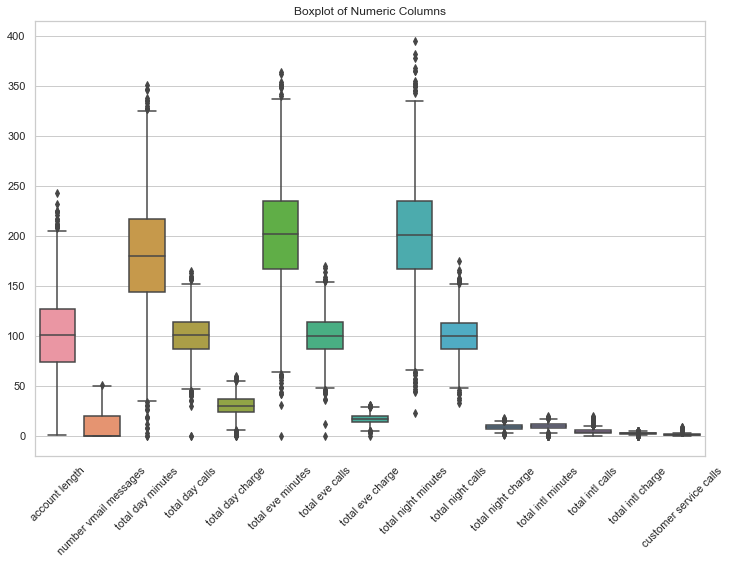

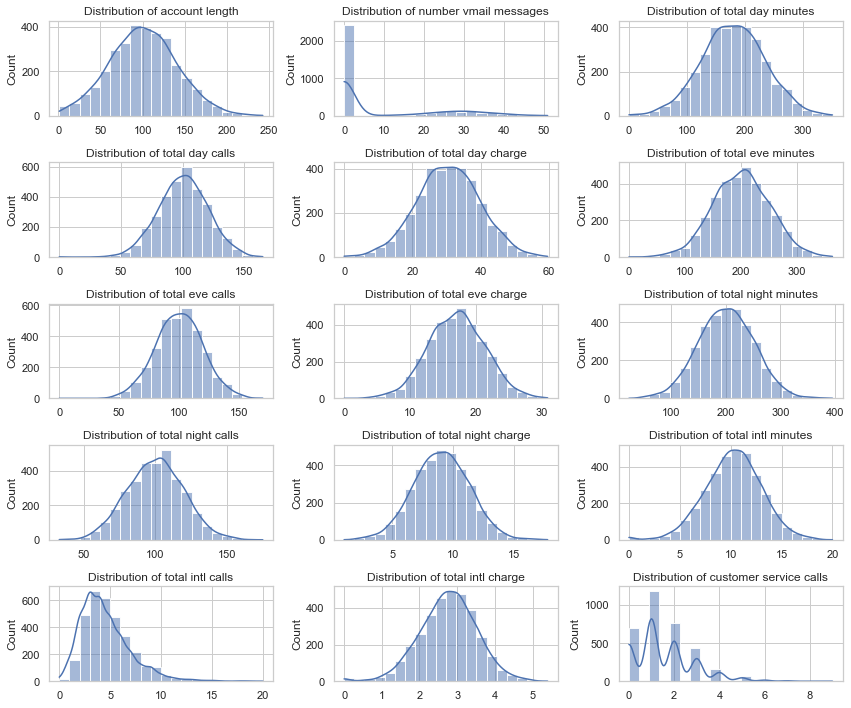

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                   'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create a boxplot using Seaborn
sns.set(style="whitegrid")  
plt.figure(figsize=(12, 8))  

# Create the boxplot using Seaborn
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45) 
plt.title("Boxplot of Numeric Columns")
plt.show()


# Create a histogram using Seaborn(visualize distribution of numerical variables)
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Create the grid of distribution plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel("")  # Remove the x-label for better layout

plt.tight_layout()
plt.show()

Upon visual examination via box plots, we identified the presence of a few outliers. However, these outliers do not appear to significantly skew the data and are not severe enough to warrant their removal. Furthermore, the majority of our numeric variables exhibit distributions that closely resemble the normal distribution. This distribution pattern suggests that our data is well-suited for various statistical analyses and modeling approaches, as it meets the assumptions of many statistical methods.

<a id="eda"></a>
## 5. Exploratory Data Analysis

During our Exploratory Data Analysis (EDA), we will examine the relationships between various factors and customer churn. Our goal is to address specific business objectives outlined by Syria Tel. This process will enable us to uncover insights, detect patterns, and make informed conclusions to better comprehend the reasons for customer churn. Ultimately, these findings will inform strategic decision-making to reduce churn and improve customer retention.

In [7]:
# Calculate the correlations between "churn" and all numeric variables
correlations = df.corr()["churn"]

# Sort the correlations in descending order to find the most highly correlated variables
sorted_correlations = correlations.sort_values(ascending=False)

# Print the correlations
print(sorted_correlations)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


Three key features, namely 'Customer service calls,' 'Total day minutes,' and 'Total day charge,' exhibit a high correlation with customer churn. To gain deeper insights into this relationship and its implications, we intend to visualize these correlations. 

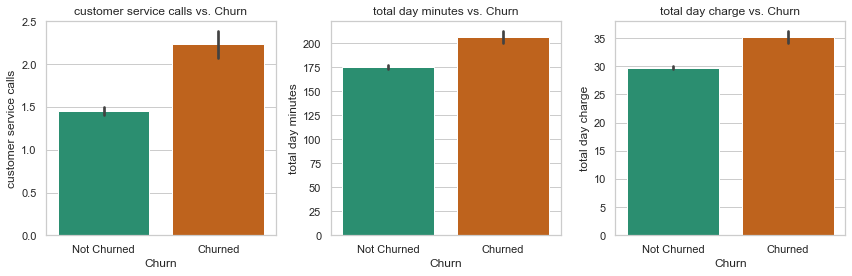

In [8]:
# Features of interest
features_of_interest = ["customer service calls", "total day minutes", "total day charge"]

# Create a single figure with shared x and y axes
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

for i, feature in enumerate(features_of_interest):
    sns.barplot(x="churn", y=feature, data=df, palette="Dark2", ax=axes[i])
    axes[i].set_title(f"{feature} vs. Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(feature)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(["Not Churned", "Churned"])

plt.tight_layout()
plt.show()


Customer service calls, total day minutes, and total day charge exhibit significantly higher values for churned customers compared to non-churned customers. Among these, customer service calls stand out with the most notable difference, indicating that customers who churn often require more interactions with customer service.

We will calculate the total charges for each customer and examine their relationship with customer churn. This analysis will help us understand how the total charges incurred by customers are associated with their decision to churn or not.

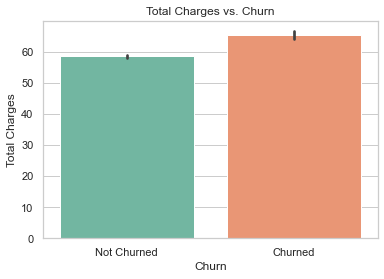

In [9]:
# Calculate total charges
df["total charges"] = df["total day charge"] + df["total night charge"] + df["total eve charge"] + df["total intl charge"]

# Plot total charges vs churn
plt.figure(figsize=(6, 4))
sns.barplot(x="churn", y="total charges", data=df, palette="Set2")
plt.title("Total Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()

The barplot highlights a notable pattern: the total charges for churned customers tend to be higher than those for non-churned customers. This observation suggests that as the total charges increase, the likelihood of customers churning also increases.

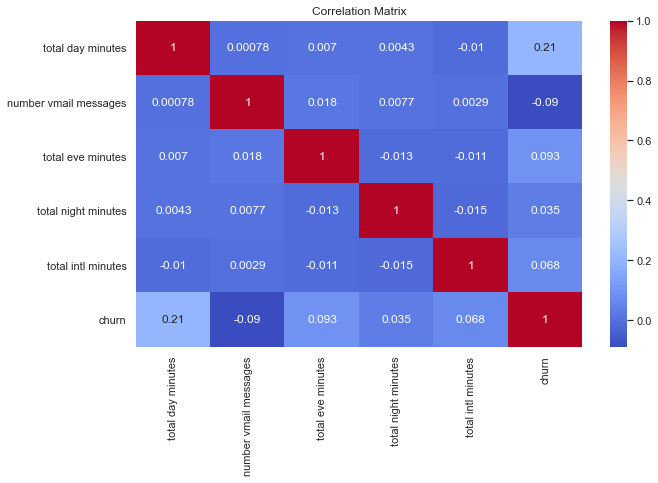

In [10]:
correlation_matrix = df[['total day minutes', 'number vmail messages', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix reveals a predominantly positive relationship among the variables, except for the 'number of voicemail messages.' Notably, the 'total day minutes' exhibit a stronger positive correlation with churn(compared to other variables), which suggests a potential issue with network connectivity during the day. 

Let's delve into the distribution of churned customers to gain a deeper understanding of their characteristics and behaviors.

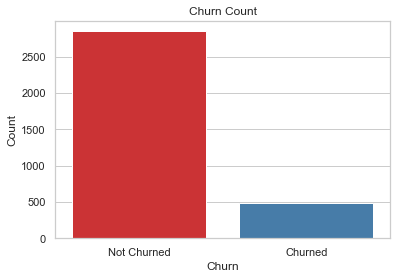

In [11]:
churn_counts = df["churn"].value_counts()
# Create a bar plot
plt.figure(figsize=(6, 4))

sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set1")
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()

From our visualization, it's evident that the number of customers who churned is significantly smaller than the number of customers who did not churn. The contrast between these two groups is quite pronounced, indicating that a substantial majority of customers did not churn.

<a id="modeling"></a>
## 6. Modeling


With the understanding that the number of customers who churned is significantly smaller than those who did not, we are now ready to embark on our model-building journey. Here's an overview of the steps we'll follow:

1. **Feature selection:** We'll carefully select the most relevant features for predicting customer churn.

2. **Data Splitting:** We'll start by splitting our dataset into a training and a testing dataset. This will allow us to train our model on one part of the data and evaluate its performance on a different, unseen part.

3. **Data Preprocessing:** We'll preprocess our data, which may involve handling categorical variables, scaling features, dealing with missing values (if any), and more. This step ensures our data is ready for modeling.

4. **Baseline Model - Logistic Regression:** We'll build a baseline model using logistic regression, a commonly used algorithm for binary classification. This will serve as our initial model for comparison.

5. **Exploring Different Models:** We'll explore a variety of machine learning models, such as decision trees, random forests, bagging classifier, and more. Each model will be tuned and evaluated to determine its effectiveness.

6. **Model Evaluation:** We will evaluate the performance of each model using appropriate metrics, such as accuracy, precision, recall, F1 score, and ROC-AUC. This will help us identify the best-performing model.

7. **Pipeline Building:** Once we select the best model, we'll construct a data preprocessing and modeling pipeline to streamline the process. This pipeline can be saved and reused for future predictions.

8. **Model Persistence:** We'll save our selected model, allowing it to be reused without the need to retrain it from scratch.

By following these steps, we aim to build a predictive model that can effectively determine whether customers are likely to churn, ultimately helping us make data-driven decisions to retain and serve our customers better.

### Feature Selection

Based on our domain knowledge and a careful analysis of feature importance, we have selected the following features to predict customer churn:
1. Total Day Minutes

2. Total Day Charge

3. Total Eve Minutes

4. Total Eve Charge

5. Total Intl Charge

6. Total Intl Minutes

7. Total Night Charge

8. Total Night Minutes

9. Total Day Calls

In [12]:
# Feature selection
features = ["total day minutes","total day charge","total eve minutes",
            "total eve charge","total intl charge","total intl minutes",
            "total night charge","total night minutes","total day calls","churn"]

In [13]:
# Dataframe using selected features
new_df = df[features]

# Define target and predictor variables
y = new_df["churn"]
X = new_df.drop("churn",axis = 1)

### Data Splitting

In [14]:
# Split train and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

To address the issue of varying scales in our data, we'll perform a standardization or normalization process. This step ensures that all our features are on a common scale, making them directly comparable in our machine learning model. 

### Data Preprocessing

In [15]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Instantiate scaler
scaler = StandardScaler()

# Fit and transform  train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Previously, we observed an imbalance in the target variable, which can lead to biased model performance. To address this issue, we'll employ Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes in our dataset.

In [16]:
# Import the SMOTE library
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your feature data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

### Baseline Model - Logistic Regression

In [17]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit on train data
model = logreg.fit(X_train_resampled,y_train_resampled)

# Predict
y_pred = model.predict(X_test_scaled)

In [18]:
# Model Evaluation

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Evaluate using cross_val_score and classification report
score = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_accuracy = score.mean()

# Print the scores
print(f"Accuracy: {mean_accuracy:.2f}")
print()
print(classification_report(y_test,y_pred))

Accuracy: 0.59

              precision    recall  f1-score   support

       False       0.91      0.60      0.73       566
        True       0.23      0.67      0.35       101

    accuracy                           0.61       667
   macro avg       0.57      0.64      0.54       667
weighted avg       0.81      0.61      0.67       667



The results suggest that the model has better precision and recall for the "False" class (customers who did not churn) than for the "True" class (customers who churned). This indicates that the model is better at identifying non-churning customers but is less accurate at predicting customers who churn. The model's cross val score of accuracy is 59%, which means the model's performance is moderate, but there is room for improvement, especially in correctly identifying churned customers.

AUC for the Testing data is : 0.7160200118951824
AUC for the Training data is : 0.6461541646602728


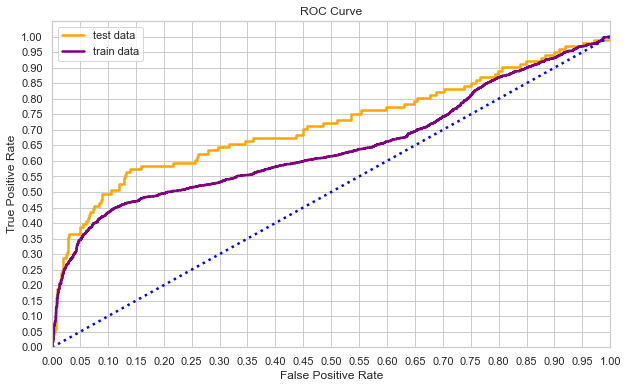

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc,accuracy_score

# Calculate the ROC curve for the test data
y_score = model.decision_function(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f"AUC for the Testing data is : {roc_auc}")

# Calculate the ROC curve for the training data
y_score_train = model.decision_function(X_train_resampled)
false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_resampled, y_score_train)
roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
print(f"AUC for the Training data is : {roc_auc_train}")

# Create the ROC curve plot
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, label="test data", color="orange",lw = 2.5)
plt.plot(false_positive_rate_train, true_positive_rate_train, label="train data", color="purple",lw = 2.5)
plt.plot([0, 1], [0, 1], linestyle="dotted", color="blue",lw = 2.5)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xticks([i / 20 for i in range(0, 21)])
plt.yticks([i / 20 for i in range(0, 21)])

# Label the axes and set a title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

# Show the plot
plt.legend()
plt.show()


An AUC of 0.716 for the test data is moderately good.It suggests that the model has some capability to differentiate between the two classes (churn and non-churn).However, to improve the model's predictive performance, we need to proceed with further evaluation and model tuning.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values of C
    'penalty': ['l2'],                    # Only L2 penalty
    'solver': ['liblinear', 'lbfgs']      # Solvers
}


# Create the grid search object
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=100),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric is accuracy
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to your data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best combination of hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_scaled)


Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Now that we have identified the best hyperparameters for our logistic regression model, let's use these optimized settings to build a new model and evaluate its performance. 

In [21]:
#Instantiate logistic regression model
logreg_2 = LogisticRegression(C= 100,penalty = "l2",solver = "liblinear")

#Fit the model
model_2 = logreg_2.fit(X_train_resampled,y_train_resampled)

#Predict
y_pred_2 = model_2.predict(X_test_scaled)

In [22]:
# Compute average accuracy using cross-validation
avg_accuracy = cross_val_score(logreg_2, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_2)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(classification_rep)


Average Accuracy: 0.60
              precision    recall  f1-score   support

       False       0.91      0.61      0.73       566
        True       0.23      0.67      0.35       101

    accuracy                           0.62       667
   macro avg       0.57      0.64      0.54       667
weighted avg       0.81      0.62      0.67       667



AUC for the Testing data is: 0.7154952244341042
AUC for the Training data is: 0.6461541646602728


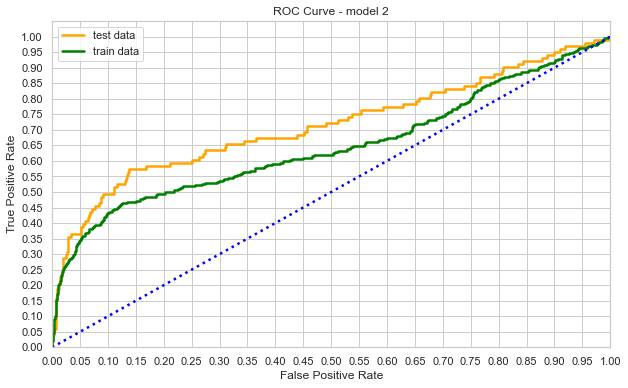

In [23]:
# Calculate the ROC curve for the test data
y_score_2 = model_2.decision_function(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score_2)
roc_auc = auc(false_positive_rate,true_positive_rate)
print(f"AUC for the Testing data is: {roc_auc}")

# Calculate the ROC curve for the train data
y_score_train = model_2.decision_function(X_train_scaled)
false_positive_rate_train, true_positive_rate_train, thresholds = roc_curve(y_train, y_score_train)
roc_auc = auc(false_positive_rate_train,true_positive_rate_train)
print(f"AUC for the Training data is: {roc_auc_train}")

# Create the ROC curve plot
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, label="test data", color="orange",lw = 2.5)
plt.plot(false_positive_rate_train, true_positive_rate_train, label="train data", color="green",lw = 2.5)
plt.plot([0, 1], [0, 1], linestyle="dotted", color="blue",lw = 2.5)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xticks([i / 20 for i in range(0, 21)])
plt.yticks([i / 20 for i in range(0, 21)])

# Label the axes and set a title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - model 2")

# Show the plot
plt.legend()
plt.show()

Our tuned model demonstrates reasonably good precision for non-churned customers, but it struggles to identify churned customers effectively. The AUC score is moderately good, indicating some ability to distinguish between the two classes.Despite tuning, our model's cross val score of accuracy has seen only a modest increase, from 59% to 60%.

To further enhance our model's performance, let's explore ensemble methods and build another model. We will evaluate its performance and compare it to the tuned logistic regression model. This will help us determine if ensemble methods can provide a more robust solution for predicting customer churn.Our approach begins with the implementation of several ensemble methods, including a Decision Tree Classifier, Bagging Classifier, Random Forest, and XGBoost

### Exploring Different Models

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the hyperparameters to search over
criteria = ["gini", "entropy"]
max_depths = [1, 2, 3, 4, 5]
random_states = [42]

# Variables to store the best hyperparameters and accuracy
best_params = {}
best_accuracy = 0.0

# Iterate through hyperparameters
for criterion in criteria:
    for max_depth in max_depths:
        for random_state in random_states:
            # Instantiate DecisionTreeClassifier with specified hyperparameters
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)
            
            # Fit the model 
            tree.fit(X_train_resampled, y_train_resampled)
            
            # Perform cross-validation and evaluate the model
            scores = cross_val_score(tree, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
            mean_accuracy = scores.mean()
            
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_params = {'Criterion': criterion, 'Max Depth': max_depth, 'Random State': random_state}

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'Criterion': 'gini', 'Max Depth': 5, 'Random State': 42}


Let's build our decision tree with the best hyperparameters

In [25]:
# Define the best hyperparameters
best_criterion = 'gini'
best_max_depth = 5
random_state = 42

# Instantiate the DecisionTreeClassifier with the best hyperparameters
decision_tree = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, random_state=random_state)

# Fit the model to the training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tree = decision_tree.predict(X_test_scaled)

# Evaluate the decision tree model 
score = cross_val_score(decision_tree, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_accuracy = score.mean()
print(f"Accuracy: {mean_accuracy:.2f}")
print()
print(classification_report(y_test,y_pred_tree))

Accuracy: 0.69

              precision    recall  f1-score   support

       False       0.92      0.71      0.80       566
        True       0.28      0.63      0.39       101

    accuracy                           0.70       667
   macro avg       0.60      0.67      0.60       667
weighted avg       0.82      0.70      0.74       667



The Decision Tree Model results shows an improved model with better precision, recall, and F1-score, particularly for the 'True' class, indicating an enhanced capability to identify churn cases. The overall cross val score with an accuracy of 0.69 suggests the model's improved performance.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, ParameterGrid

# Define the BaggingClassifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Define hyperparameters for BaggingClassifier
bagging_param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator__max_depth': [5, 10, 15],
}

# Variables to store the best hyperparameters and accuracy
best_params = {}
best_accuracy = 0.0

# Iterate through hyperparameter grid
for params in ParameterGrid(bagging_param_grid):
    # Construct the BaggingClassifier with specified parameters
    bagging.set_params(**params)

    # Perform cross-validation and evaluate the model
    scores = cross_val_score(bagging, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

# Print the best hyperparameters for BaggingClassifier
print(f"BaggingClassifier - Best Hyperparameters: {best_params}, Best Accuracy: {best_accuracy}")


BaggingClassifier - Best Hyperparameters: {'estimator__max_depth': 15, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 30}, Best Accuracy: 0.8612085101895547


In [27]:
# Define hyperparameters as a dictionary
bagging_params = {
    'estimator': DecisionTreeClassifier(max_depth=15),
    'n_estimators': 30,
    'max_samples': 1.0,
    'max_features': 1.0,
    'random_state': 42
}

# Create the BaggingClassifier with the specified hyperparameters
bagging = BaggingClassifier(**bagging_params)

# Fit the BaggingClassifier to your training data
bagging.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test data
y_pred = bagging.predict(X_test_scaled)

# Calculate accuracy
scores = cross_val_score(bagging, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()
print(f"Accuracy: {mean_accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.84      0.87       566
        True       0.37      0.54      0.44       101

    accuracy                           0.79       667
   macro avg       0.64      0.69      0.66       667
weighted avg       0.83      0.79      0.81       667



It's evident that our model has made significant improvements. The cross-validation score of accuracy has risen from 0.69 to 0.86, indicating that our model's predictions are 86% accurate. This is a substantial leap in performance.

Moreover, the precision, recall, and F1-scores have shown remarkable enhancements for both classes: "True" (customers who churned) and "False" (customers who did not churn). This signifies that the model's ability to correctly identify both churned and non-churning customers has significantly improved. These improvements are indicative of a more robust and reliable model.

In [28]:
# Define the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_params = {}
best_accuracy = 0.0
for params in ParameterGrid(param_grid):
    # Create the model with specified hyperparameters
    model = RandomForestClassifier(random_state=42)
    model.set_params(**params)

    # Perform cross-validation and evaluate the model
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    # Check if this model has the best accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Best Accuracy: 0.8725920990506685


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=30,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model to your training data
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on your test data
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate the model using various metrics
scores = cross_val_score(bagging, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()
report = classification_report(y_test, y_pred)

print(f"Accuracy: {mean_accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.82      0.86       566
        True       0.35      0.54      0.43       101

    accuracy                           0.78       667
   macro avg       0.63      0.68      0.65       667
weighted avg       0.83      0.78      0.80       667



The model shows little to no improvement in its performance. The accuracy remains the same, and the precision, recall, and F1-score for the "True" class (customers who did churn) are consistently low. This suggests that the model still struggles to effectively identify customers who churn, and there have been no notable enhancements in its ability to do so.

In [30]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, ParameterGrid

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
}

# Variables to store the best hyperparameters and accuracy
best_params = {}
best_accuracy = 0.0

# Iterate through the parameter grid
for params in ParameterGrid(param_grid):
    # Create an XGBoost classifier with the current parameters
    xgb_classifier = xgb.XGBClassifier(
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        random_state=42
    )

    # Perform cross-validation and evaluate the model using X_train_scaled
    scores = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [31]:
import xgboost as xgb

# Define the best hyperparameters
best_hyperparameters = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

# Create an XGBoost classifier with the best hyperparameters
xgb_classifier = xgb.XGBClassifier(
    max_depth=best_hyperparameters['max_depth'],
    learning_rate=best_hyperparameters['learning_rate'],
    n_estimators=best_hyperparameters['n_estimators'],
    random_state=42
)

# Fit the model using X_train_scaled
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set (you should have X_test_scaled)
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
scores = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()
report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {mean_accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.89      0.90       566
        True       0.45      0.50      0.47       101

    accuracy                           0.83       667
   macro avg       0.68      0.69      0.69       667
weighted avg       0.84      0.83      0.84       667



The model's performance appears to have improved moderately. The accuracy now stands at 87%, indicating that the model's predictions are 87% accurate. In the classification report, we can see a better balance in precision, recall, and F1-score for both the "False" (customers who did not churn) and "True" (customers who churned) classes. While it's not a significant improvement, the model seems to be better at identifying customers who churn, resulting in a more balanced performance across different evaluation metrics.

### Pipeline Building

Our best-performing model is the XGBoost classifier with the following optimal hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}. To streamline our workflow and for future use, we will create a pipeline and save it. This pipeline will allow us to easily replicate our best model in subsequent analyses and applications.

In [32]:
from sklearn.pipeline import Pipeline
import joblib

# Define the parameter grid
param_grid = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200
}

# Create the transformers for the pipeline
transformers = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE())
]

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(**param_grid)

# Create the pipeline
pipe = Pipeline(transformers + [('xgb_classifier', xgb_classifier)])

### Model Persistence

In [33]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

<a id="recommendations"></a>
## 7. Conclusion

In this comprehensive analysis of SyriaTel's customer data, we uncovered critical insights that shed light on the factors contributing to customer churn. Three key features, namely 'Customer service calls,' 'Total day minutes,' and 'Total day charge,' displayed a high correlation with customer churn, signifying their importance in understanding and predicting churn behavior.

We observed that customers who eventually churn tend to have a higher number of 'Customer service calls,' indicating a need for increased interaction with customer service. 'Total day minutes' also play a pivotal role, showing a strong positive correlation with churn. This suggests potential network connectivity issues during daytime usage, affecting customer satisfaction.

Furthermore, our analysis revealed that churned customers generally incur higher 'Total day charges,' hinting at the impact of pricing and its relationship with customer retention. As total charges increase, the likelihood of churn also increases.

Our modeling efforts culminated in the identification of the best-performing model – **the XGBoost classifier.** With optimized hyperparameters **{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}**, this model empowers SyriaTel to effectively predict customers at risk of churning. We encapsulated this model within a pipeline for seamless replication in future analyses and real-world applications.

### Recommendations

1. First and foremost, improving customer service quality stands as a pivotal step. The analysis has underscored the strong link between a higher churn rate and increased customer service calls. By addressing service-related issues and ensuring top-notch customer satisfaction, Syria Tel can significantly lower churn rates.

2. Furthermore, optimizing the pricing strategy is of paramount importance. Our data reveals a direct correlation between rising total charges and an increased likelihood of customer churn. Syria Tel should strive to strike a pricing balance that retains customers while ensuring profitability.

3. The network quality issue cannot be overlooked, particularly during peak daytime hours. A robust positive correlation between churn and "total day minutes" suggests network connectivity problems. Resolving these issues, including call dropouts and improving call quality, will result in better service and reduced churn.

4. Incorporating the XGBoost model into the decision-making process is a wise choice. This machine learning tool can effectively identify at-risk customers and enable Syria Tel to implement targeted retention strategies. Continuous monitoring and refinement of the model will play a vital role in achieving the overarching objectives of reducing churn and enhancing customer retention.


By addressing the insights and recommendations derived from this analysis, SyriaTel has the opportunity to reduce churn rates, enhance customer service, optimize pricing strategies, and improve network quality. As SyriaTel takes proactive steps to tackle these areas, it can solidify its position in the telecommunications industry and ensure sustained growth.